In [1]:
import pandas as pd

#Question 1a
df1 = pd.read_csv("apple_stocks_1980_2014.csv")
df2 = pd.read_csv("apple_stocks_2015_2020.csv")
full_dataset = df1.append(df2, ignore_index=True)

In [2]:
#Question 1b
full_dataset['Date'] = pd.to_datetime(full_dataset['Date']) 
full_dataset = full_dataset.set_index(full_dataset['Date'])
full_dataset.index.name = None
full_dataset.head()

,Date,Open,High,Low,Close,Volume,Adj Close
2014-07-08,2014-07-08,96.27,96.80,93.92,95.35,65130000.0,95.35
2014-07-07,2014-07-07,94.14,95.99,94.10,95.97,56305400.0,95.97
2014-07-03,2014-07-03,93.67,94.10,93.20,94.03,22891800.0,94.03
2014-07-02,2014-07-02,93.87,94.06,93.09,93.48,28420900.0,93.48
2014-07-01,2014-07-01,93.52,94.07,93.13,93.52,38170200.0,93.52


In [3]:
#Question 1c
full_dataset = full_dataset.sort_index(ascending=True)
full_dataset.head()

,Date,Open,High,Low,Close,Volume,Adj Close
1980-12-12,1980-12-12,28.75,28.87,28.75,28.75,117258400.0,0.45
1980-12-15,1980-12-15,27.38,27.38,27.25,27.25,43971200.0,0.42
1980-12-16,1980-12-16,25.37,25.37,25.25,25.25,26432000.0,0.39
1980-12-17,1980-12-17,25.87,26.00,25.87,25.87,21610400.0,0.40
1980-12-18,1980-12-18,26.63,26.75,26.63,26.63,18362400.0,0.41


In [5]:
#Question 2
business_month_end = full_dataset.resample('M').last()
business_month_end.fillna(0, inplace =True)
business_month_end

,Date,Open,High,Low,Close,Volume,Adj Close
1980-12-31,1980-12-31 00:00:00,34.250000,34.250000,34.130000,34.130000,8937600.0,0.530000
1981-01-31,1981-01-30 00:00:00,28.500000,28.500000,28.250000,28.250000,11547200.0,0.440000
1981-02-28,1981-02-27 00:00:00,26.500000,26.750000,26.500000,26.500000,3690400.0,0.410000
1981-03-31,1981-03-31 00:00:00,24.750000,24.750000,24.500000,24.500000,3998400.0,0.380000
1981-04-30,1981-04-30 00:00:00,28.380000,28.620000,28.380000,28.380000,3152800.0,0.440000
...,...,...,...,...,...,...,...
2019-08-31,2019-08-30 00:00:00,210.160004,210.449997,207.199997,208.740005,21143400.0,207.622437
2019-09-30,2019-09-30 00:00:00,220.899994,224.580002,220.789993,223.970001,25977400.0,222.770889
2019-10-31,2019-10-31 00:00:00,247.240005,249.169998,237.259995,248.759995,34790500.0,247.428162
2019-11-30,2019-11-29 00:00:00,266.600006,268.000000,265.899994,267.250000,11654400.0,266.617249


In [6]:
#Question 3
number_of_months = business_month_end['Date'].count()
print("The number of months is: " + str(number_of_months))

The number of months is: 469


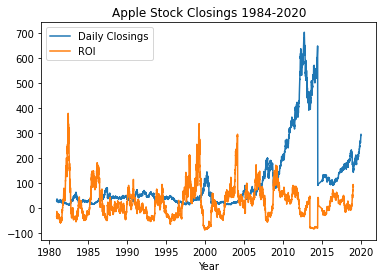

In [8]:
#Question 4
import matplotlib.pyplot as plt

Date = full_dataset['Date']
DailyClosings = full_dataset['Close']

full_dataset = full_dataset.asfreq('D', method = 'pad')
Dailyclosings = full_dataset.asfreq('D', method = 'pad')

plt.plot(Date, DailyClosings, label = 'Daily Closings')

ROI = 100 * (DailyClosings.shift(-365) / DailyClosings - 1)
plt.plot(Date, ROI, label = 'ROI')
plt.xlabel('Year')
plt.legend()
plt.title('Apple Stock Closings 1984-2020')
plt.show()

In [7]:
#Question 5

from scipy.stats import t

#Null Hypothesis is Apple traded the same volume of stocks in 2018 and 2019
#Alternate Hypothesis is Apple traded different volumes of stock in 2018 and 2019

N=15

start_date18 = '2017-12-31'
end_date18 = '2018-12-31'
start_date19 = '2018-12-31'
end_date19 = '2019-12-31'

Values_2018 = (full_dataset['Date'] > start_date18) & (full_dataset['Date'] <= end_date18)
Values_2019 = (full_dataset['Date'] > start_date19) & (full_dataset['Date'] <= end_date19)
sample_2018 = full_dataset.loc[Values_2018]
sample_2019 = full_dataset.loc[Values_2019]

sample_2018 = sample_2018['Volume'].sample(n=N)
sample_2019 = sample_2019['Volume'].sample(n=N)

mean_2018 = sample_2018.mean()
mean_2019 = sample_2019.mean()

#standard deviation
std_2018 = sample_2018.std()
std_2019 = sample_2019.std()

#standard errors
se_2018 = sample_2018.sem()
se_2019 = sample_2019.sem()
sed = (se_2019**2.0 + se_2018**2.0)**(1/2)

#t statistic
t_stat = (mean_2018-mean_2019)/sed

#degrees of freedom
df = N+N-2

#critical value and p-value
alpha = 0.05
cv = t.ppf(1.0 - alpha, df)
p = (1 - t.cdf(abs(t_stat), df)) * 2

print(t_stat,p)
if p > alpha:
    print('Null Hypothesis: Apple traded the same volume of stocks in 2018 and 2019')
else:
    print('Alternate Hypothesis: Apple traded different volumes of stock in 2018 and 2019')

2.26051453439082 0.03175421525689415
Alternate Hypothesis: Apple traded different volumes of stock in 2018 and 2019
